In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sym.Symbol('x')
y = sym.Symbol('y')

In [3]:
def f(x, y):
    return x**2 + 2*y**2

In [4]:
func = f(x, y)
func

x**2 + 2*y**2

In [5]:
def grad(func, vector):
    
    dx = sym.diff(func, x)
    dy = sym.diff(func, y)
    
    return np.array([
        dx.subs([
            (x, vector[0]),
            (y, vector[1])
        ]), 
        dy.subs([
            (x, vector[0]),
            (y, vector[1])
        ])
    ], dtype='float64')

In [6]:
def gd(func, start_point, learning_rate=0.01, iterations=10, epsilon=1e-10):
    vector = np.array(start_point, dtype='float64')
    
    res = []
    res.append(vector)
    
    for epoch in range(iterations):
        g = grad(func, vector)
        
        diff = -learning_rate * g
        if np.linalg.norm(g) <= epsilon:
            break

        vector = vector + diff
        res.append(vector)
        
    return np.array(res)

In [7]:
res = gd(func, [-1.0, 1.0], iterations=50, learning_rate=0.1)

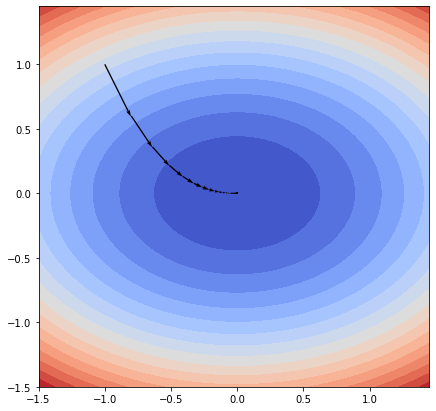

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))

X = np.arange(-1.5, 1.5, 0.05)
Y = np.arange(-1.5, 1.5, 0.05)

X, Y = np.meshgrid(X, Y)

Z = f(X, Y)
ax.contourf(X, Y, Z, 20, cmap='coolwarm');

X = np.concatenate(res[:, [0]])
Y = np.concatenate(res[:, [1]])

for i in range(len(X) - 1):
    delta_x = X[i + 1] - X[i]
    delta_y = Y[i + 1] - Y[i]
    ax.quiver(X[i], Y[i], delta_x, delta_y, units='xy',scale=1.0, width=0.01)

    
plt.show()

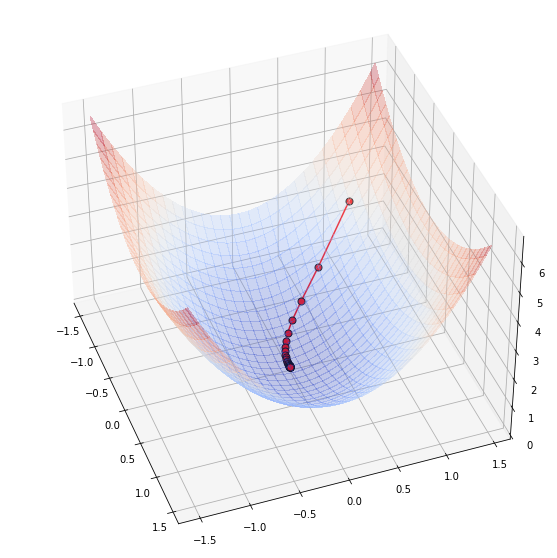

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

X = np.arange(-1.5, 1.5, 0.05)
Y = np.arange(-1.5, 1.5, 0.05)

X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=1, antialiased=False, alpha=0.3)

X = np.concatenate(res[:, [0]])
Y = np.concatenate(res[:, [1]])
Z = f(X,Y)

ax.plot(X, Y, Z, color='r', marker='o', markersize=7, markeredgecolor='k')
ax.view_init(40, -20)


plt.show()